# Kiran avhad

# Task 2

# 
Supervised Machine Learning Dataset : https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python

Perform Data analysis and use different machine learning algorithms.

Compare at least 3 different Algorithms and show their accuracies with the help of graph

# importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("D:/kl/diabetes_data.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.drop_duplicates(inplace = True)

# Data visualisation

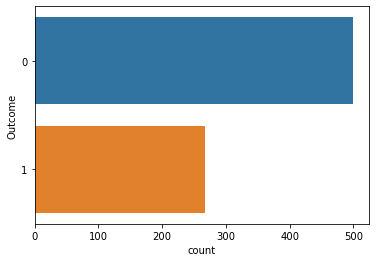

In [17]:
sns.countplot(y='Outcome',data=df)

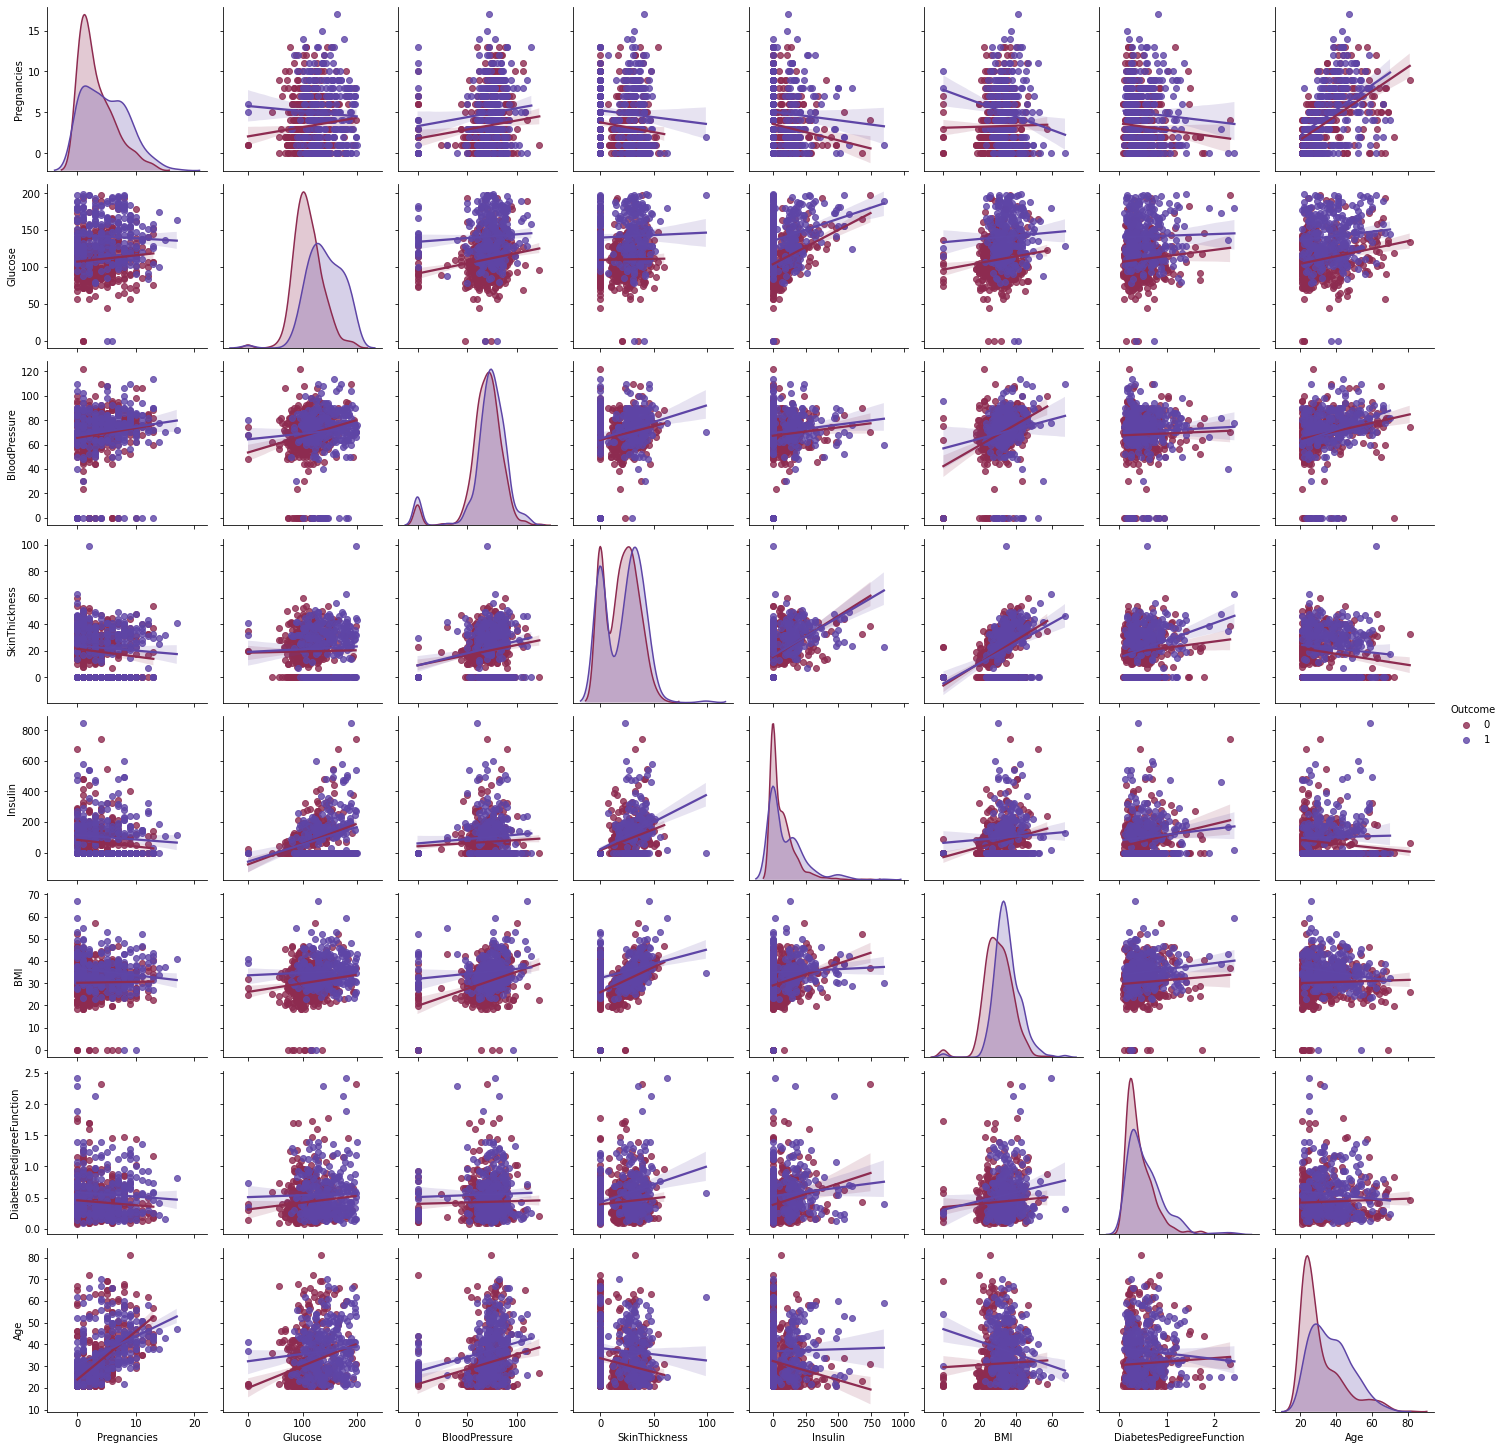

In [18]:
sns.pairplot(data=df,hue='Outcome',kind='reg',palette='twilight_r')

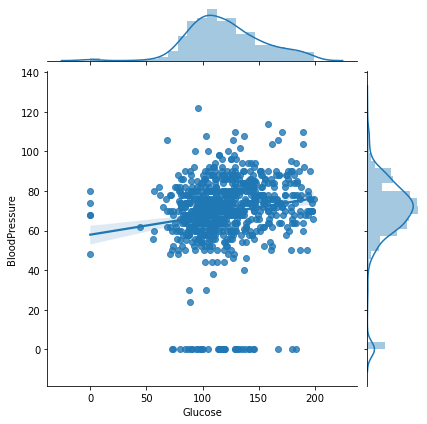

In [19]:
sns.jointplot(x='Glucose', y='BloodPressure',data=df,kind='reg')

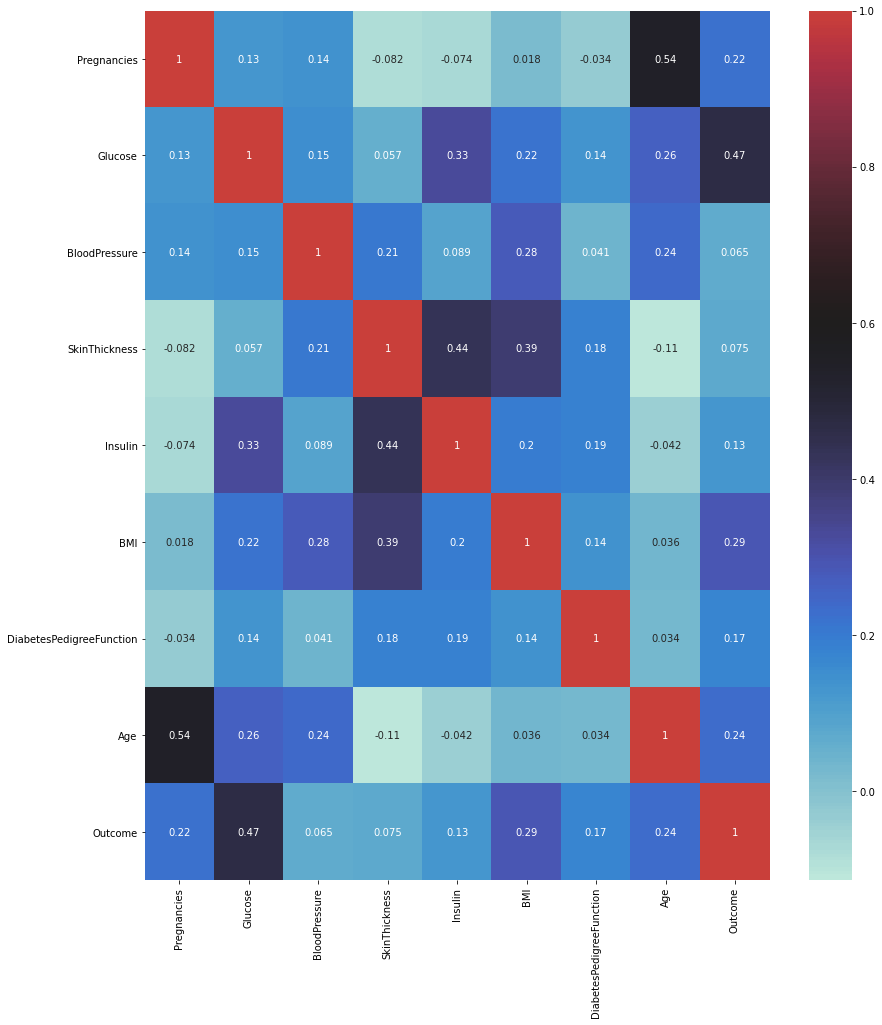

In [24]:

plt.figure(figsize= (14,16))
sns.heatmap(df.corr(),annot = True,center=0.6)

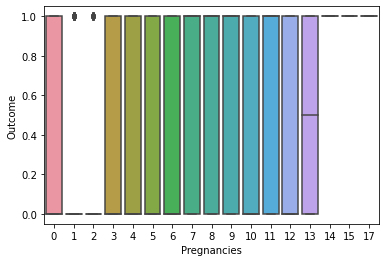

In [23]:
sns.boxplot(data=df,x='Pregnancies', y='Outcome')

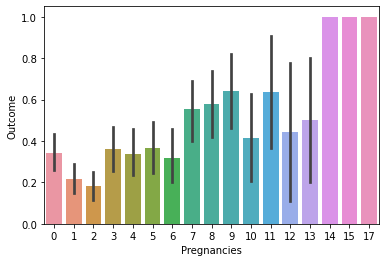

In [26]:
sns.barplot(x='Pregnancies', y='Outcome',data=df)

In [28]:
Input = df.drop("Outcome",axis = 1)
Output = df["Outcome"]

# Normalization

In [29]:
Input = (Input-Input.min())/(Input.max()-Input.min())

In [30]:
Input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


# spliting dataset

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(Input,Output,test_size = 0.4,random_state = 38)

# Logistic regression

In [32]:

lr = LogisticRegression(max_iter = 200)
lr.fit(X_train,Y_train)
lr_score = lr.score(X_test,Y_test)
Y_pred = lr.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
df = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
df.head()

[[181  18]
 [ 54  55]]


,Actual,Predicted
3,0,0
579,1,1
369,1,0
661,1,1
715,1,1


# Decision tree classifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_score = dt.score(X_test,Y_test)
Y_pred = dt.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
df = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
df.head()

[[155  44]
 [ 40  69]]


,Actual,Predicted
3,0,0
579,1,1
369,1,1
661,1,1
715,1,1


# Random forest classifier

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_score = rf.score(X_test,Y_test)
Y_pred = rf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
df = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
df.head()

[[161  38]
 [ 41  68]]


,Actual,Predicted
3,0,0
579,1,1
369,1,1
661,1,1
715,1,1


# Accuracies of all models

In [35]:
print("Logistic Regression Accuracy on Test Data",str(lr_score*100))
print("Decision Tree Classifier Accuracy on Test Data",str(dt_score*100))
print("Random Forest Classifier Accuracy on Test Data",str(rf_score*100))

Logistic Regression Accuracy on Test Data 76.62337662337663
Decision Tree Classifier Accuracy on Test Data 72.72727272727273
Random Forest Classifier Accuracy on Test Data 74.35064935064936


<BarContainer object of 3 artists>

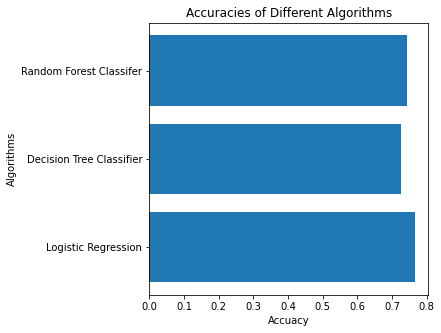

In [36]:
accuracy = [lr_score,dt_score,rf_score]
models = ["Logistic Regression","Decision Tree Classifier","Random Forest Classifer"]
plt.figure(figsize = (5,5))
plt.yticks(np.arange(len(accuracy)),models)
plt.xlabel("Accuacy")
plt.ylabel("Algorithms")
plt.title("Accuracies of Different Algorithms")
plt.barh(np.arange(len(accuracy)),accuracy)